In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/Michael/projects/shape_sharing/src/')
from common import paths
from common import parameters
from common import voxel_data
from common import mesh


In [2]:
# data_folder = '/Users/Michael/projects/shape_sharing/data/desks/oisin_1/data/saved_aaron/'
data_folder = '/Users/Michael/projects/shape_sharing/data/desks/test_scans/saved_00151/'
from common import images
vid = images.RGBDVideo()
vid.load_from_yaml(data_folder + 'poses.yaml', [0, 95])

<matplotlib.colorbar.Colorbar instance at 0x10897f7e8>

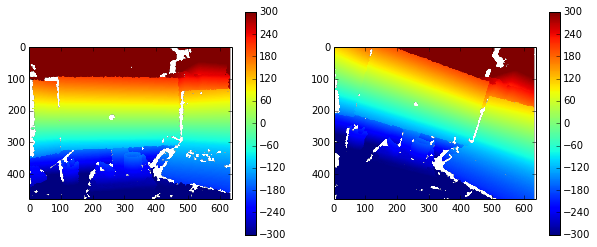

In [3]:
def plot_world_z(im):
    '''plots the world z location at each pixel'''
    xyz = im.get_world_xyz()
    temp = xyz[:, 1].reshape(im.depth.shape)
    plt.imshow(temp)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_world_z(vid.frames[0])
plt.clim(-300, 300)
plt.colorbar()
vmin, vmax = plt.gci().get_clim()
plt.subplot(122)
plot_world_z(vid.frames[1])
plt.clim(vmin, vmax)
plt.colorbar()

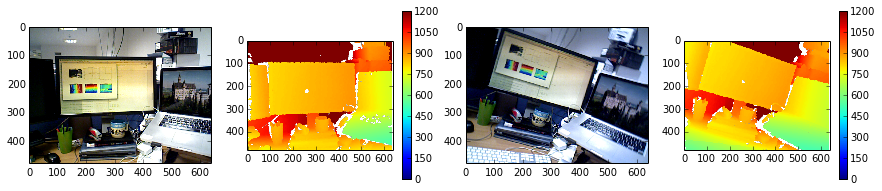

In [4]:
plt.figure(figsize=(15, 3))
for count, f in enumerate(vid.frames):
    plt.subplot(1, 4, 2*count+1)
    plt.imshow(f.rgb)
    plt.subplot(1, 4, 2*count+2)
    plt.imshow(f.depth)
    plt.clim(0, 1200)
    plt.colorbar()

(233, 3)


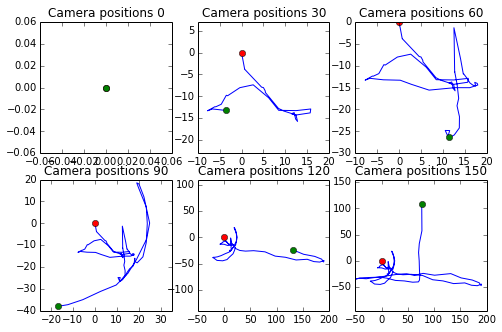

In [6]:
from common import images
all_vid = images.RGBDVideo()
all_vid.load_from_yaml(data_folder + 'poses.yaml')
# for fr in all_vid.frames:
#     fr.cam.H[:, 0] *= -1

ts = []
Rs = []
for fr in all_vid.frames:
    ts.append(fr.cam.H[:3, -1])
    Rs.append(fr.cam.H[:3, :3])
ts = np.array(ts)
print ts.shape

plt.figure(figsize=(8, 8))
for count in range(6):
    plt.subplot(3, 3, count+1)
    x = 30
    plt.plot(ts[:(x*count) + 1, 0], ts[:(x*count) + 1, 1])
    plt.plot(ts[0, 0], ts[0, 1], 'ro')
    plt.plot(ts[x*count, 0], ts[x*count, 1], 'go')
    plt.axis('equal')
    plt.title('Camera positions %d' % (x*count))

/Users/Michael/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


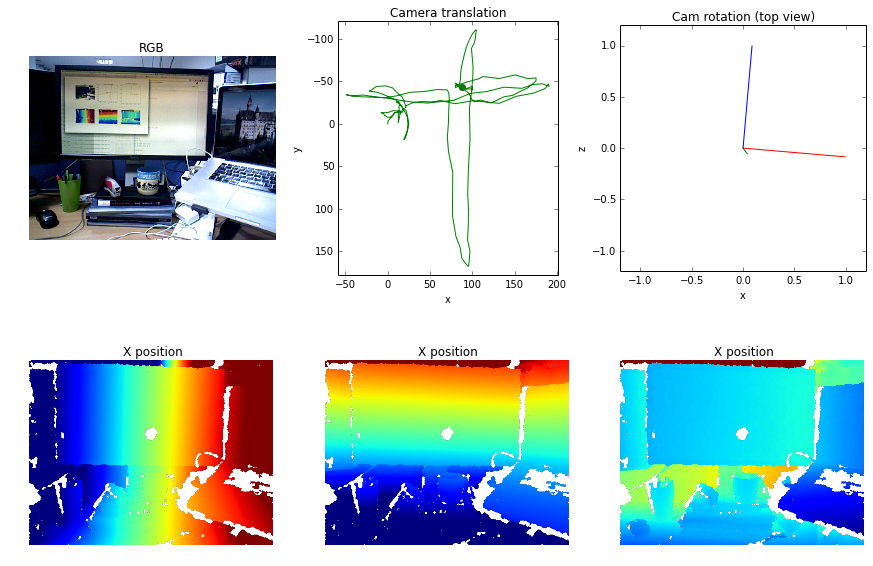

In [7]:
# Same as basic_example, but writes files using a single MovieWriter instance
# without putting on screen
# -*- noplot -*-
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=500)

fig = plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)
import copy

ts_min = np.min(ts, axis=0)
ts_max = np.max(ts, axis=0)

ims = []
for count, frame in enumerate(all_vid.frames):
    
    im1 = ax1.imshow(frame.rgb)
    ax1.axis('off')
    ax1.set_title('RGB')

    im3a, = ax2.plot(frame.cam.H[0, -1], frame.cam.H[1, -1], 'go')
    im3b, = ax2.plot(ts[:count+1, 0], ts[:count+1, 1])
    ax2.set_xlim(ts_min[0]-10, ts_max[0]+10)
    ax2.set_ylim(ts_min[1]-10, ts_max[1]+10)
    ax2.set_aspect('equal', adjustable='box')
    ax2.invert_yaxis()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Camera translation')

    R = copy.deepcopy(frame.cam.H[:3, :3])
#     R[:, 0] *= -1
    im4a, = ax3.plot([0, R[0, 0]], [0, R[0, 2]], 'r-')
    im4b, = ax3.plot([0, R[1, 0]], [0, R[1, 2]], 'g-')
    im4c, = ax3.plot([0, R[2, 0]], [0, R[2, 2]], 'b-')
    ax3.set_xlim(-1.2, 1.2)
    ax3.set_ylim(-1.2, 1.2)
    ax3.set_aspect('equal', adjustable='box')
    ax3.set_xlabel('x')
    ax3.set_ylabel('z')
    ax3.set_title('Cam rotation (top view)')
            
    xyz = frame.get_world_xyz()
    im2 = ax4.imshow(xyz[:, 0].reshape(frame.depth.shape))
    ax4.axis('off')
    ax4.set_title('X position')
    im2.set_clim(-300, 300)
    
    im5 = ax5.imshow(xyz[:, 1].reshape(frame.depth.shape))
    ax5.axis('off')
    ax5.set_title('X position')
    im5.set_clim(-300, 300)
    
    im6 = ax6.imshow(xyz[:, 2].reshape(frame.depth.shape))
    ax6.axis('off')
    ax6.set_title('X position')
    im6.set_clim(500, 1500)
    
    
    ims.append([im1, im2, im3a, im3b, im4a, im4b, im4c, im5, im6])

im_ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=3000, blit=True)
im_ani.save('im.mp4', writer=writer)